# Рубежный контроль № 1

## Задания

### Задача №9.
Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения "хвостом распределения".

### Задача №29.
Для набора данных проведите удаление константных и псевдоконстантных признаков.

### Доп. задание
Для произвольной колонки данных построить график "Ящик с усами (boxplot)"

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_boston

In [2]:
data = pd.read_csv('IPODataFull.csv', sep = ',')

/Users/lina/Documents/University Shit/Master/sem_2/ML/.venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1342,1425,1432,1543,1546,1549,1551,1552,1553,1562,1587,1588,1605,1608,1615,1619,1620,1621,1622,1629,1630,1632,1633,1640,1641,1642,1643,1644,1646) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(3762, 1664)

In [4]:
data

,Symbol,DaysBetterThanSP,daysProfit,daysProfitGrouped,exactDiffernce,Year,Month,Day,dayOfWeek,closeDay0,...,usableCEOAge,usableCEOGender,usablePresidentAge,usablePresidentGender,FoundingDateGrouped,yearDifferenceGrouped,Profitable,Safe,HomeRunDay,HomeRun
0,A,122,249,200+,NaN,1999,11,18,3,28.6358,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,0,77.0,1
1,AAC,131,262,200+,232.0,2014,10,2,3,18.5000,...,40 - 49,male,Blank,Blank,2011 - present,Unknown,1,1,NaN,0
2,AAOI,125,262,200+,6054.0,2013,9,26,3,9.9600,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,0,NaN,0
3,AAP,128,261,200+,NaN,2001,11,29,3,13.9000,...,Blank,Blank,Blank,Blank,1901 - 1950,Unknown,1,0,NaN,0
4,AAT,123,127,100 - 149,181.0,2011,1,13,3,21.2500,...,Blank,Blank,Blank,Blank,2001 - 2010,Unknown,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,ZUMZ,139,261,200+,NaN,2005,5,6,4,12.4350,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,1,234.0,1
3758,ZUO,5,7,0 - 49,NaN,2018,4,12,3,20.0000,...,NaN,mostly_male,Unknown,Unknown,2001 - 2010,Unknown,0,0,NaN,0
3759,ZX,102,25,0 - 49,1035.0,2011,5,12,3,5.8500,...,Unknown,Unknown,Unknown,Unknown,2001 - 2010,Unknown,0,0,NaN,0
3760,ZYME,115,19,0 - 49,NaN,2017,4,28,4,13.0000,...,Unknown,Unknown,Unknown,Unknown,2001 - 2010,Unknown,0,0,NaN,0


## Заполнение пропусков

In [5]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [6]:
cols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
cols_with_na

['exactDiffernce',
 'highDay0',
 'openDay0',
 'lowDay0',
 'volumeDay0',
 'closeDay1',
 'highDay1',
 'openDay1',
 'lowDay1',
 'volumeDay1',
 'closeDay2',
 'highDay2',
 'openDay2',
 'lowDay2',
 'volumeDay2',
 'closeDay3',
 'highDay3',
 'openDay3',
 'lowDay3',
 'volumeDay3',
 'closeDay4',
 'highDay4',
 'openDay4',
 'lowDay4',
 'volumeDay4',
 'closeDay5',
 'highDay5',
 'openDay5',
 'lowDay5',
 'volumeDay5',
 'closeDay6',
 'highDay6',
 'openDay6',
 'lowDay6',
 'volumeDay6',
 'closeDay7',
 'highDay7',
 'openDay7',
 'lowDay7',
 'volumeDay7',
 'closeDay8',
 'highDay8',
 'openDay8',
 'lowDay8',
 'volumeDay8',
 'closeDay9',
 'highDay9',
 'openDay9',
 'lowDay9',
 'volumeDay9',
 'closeDay10',
 'highDay10',
 'openDay10',
 'lowDay10',
 'volumeDay10',
 'closeDay11',
 'highDay11',
 'openDay11',
 'lowDay11',
 'volumeDay11',
 'closeDay12',
 'highDay12',
 'openDay12',
 'lowDay12',
 'volumeDay12',
 'closeDay13',
 'highDay13',
 'openDay13',
 'lowDay13',
 'volumeDay13',
 'closeDay14',
 'highDay14',
 'openDa

In [7]:
[(c, data[c].isnull().sum()) for c in cols_with_na]

[('exactDiffernce', 2194),
 ('highDay0', 203),
 ('openDay0', 203),
 ('lowDay0', 255),
 ('volumeDay0', 13),
 ('closeDay1', 1),
 ('highDay1', 156),
 ('openDay1', 156),
 ('lowDay1', 194),
 ('volumeDay1', 14),
 ('closeDay2', 1),
 ('highDay2', 121),
 ('openDay2', 121),
 ('lowDay2', 153),
 ('volumeDay2', 14),
 ('closeDay3', 1),
 ('highDay3', 109),
 ('openDay3', 109),
 ('lowDay3', 142),
 ('volumeDay3', 14),
 ('closeDay4', 1),
 ('highDay4', 82),
 ('openDay4', 82),
 ('lowDay4', 122),
 ('volumeDay4', 14),
 ('closeDay5', 2),
 ('highDay5', 80),
 ('openDay5', 80),
 ('lowDay5', 121),
 ('volumeDay5', 15),
 ('closeDay6', 3),
 ('highDay6', 93),
 ('openDay6', 93),
 ('lowDay6', 132),
 ('volumeDay6', 16),
 ('closeDay7', 4),
 ('highDay7', 92),
 ('openDay7', 92),
 ('lowDay7', 131),
 ('volumeDay7', 17),
 ('closeDay8', 5),
 ('highDay8', 79),
 ('openDay8', 79),
 ('lowDay8', 124),
 ('volumeDay8', 18),
 ('closeDay9', 6),
 ('highDay9', 87),
 ('openDay9', 87),
 ('lowDay9', 127),
 ('volumeDay9', 19),
 ('closeDay10'

In [8]:
sorted([(c, data[c].isnull().mean()) for c in cols_with_na], key=lambda x: x[1])[::-1]

[('Fiscal_year_ends_in_October_USDYearBeforeIPO', 0.9997341839447103),
 ('Pensions_and_other_postretirement_benefitsYearBeforeIPO',
  0.9997341839447103),
 ('Fiscal_year_ends_in_December_BRLYearBeforeIPO', 0.9997341839447103),
 ('Fiscal_year_ends_in_December_CADYearBeforeIPO', 0.9997341839447103),
 ('Fiscal_year_ends_in_December_JPYYearBeforeIPO', 0.9997341839447103),
 ('Fiscal_year_ends_in_May_USDYearBeforeIPO', 0.9997341839447103),
 ('Fiscal_year_ends_in_December_CLPYearBeforeIPO', 0.9997341839447103),
 ('Regulatory_liabilitiesYearBeforeIPO', 0.9997341839447103),
 ('Prepaid_pension_costsYearBeforeIPO', 0.9997341839447103),
 ('Sales_of_intangiblesYearBeforeIPO', 0.9997341839447103),
 ('Derivative_liabilitiesYearBeforeIPO', 0.9997341839447103),
 ('Derivative_assetsYearBeforeIPO', 0.9997341839447103),
 ('Fiscal_year_ends_in_March_CADYearBeforeIPO', 0.9997341839447103),
 ('Deferred_tax_liabilitiesYearBeforeIPO', 0.9997341839447103),
 ('Fiscal_year_ends_in_August_CNYYearBeforeIPO', 0.9997

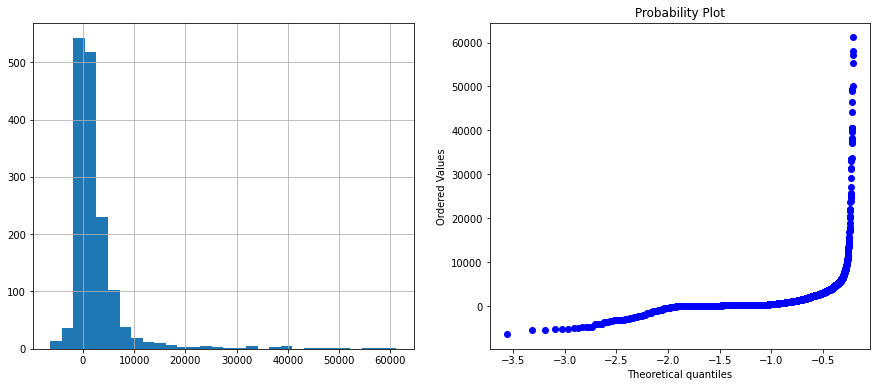

In [9]:
diagnostic_plots(data, 'exactDiffernce')

In [10]:
exactDiffernce = data['exactDiffernce'].mean() + 1.5*data['exactDiffernce'].std()
exactDiffernce

12224.959963645306

In [11]:
data['exactDiffernce'].isnull().sum()

2194

In [12]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
 
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [13]:
new_data, x, y = impute_column(data, 'exactDiffernce', 'constant', exactDiffernce)

In [14]:
data['exactDiffernce']=new_data

In [15]:
data['exactDiffernce'].isnull().sum()

0

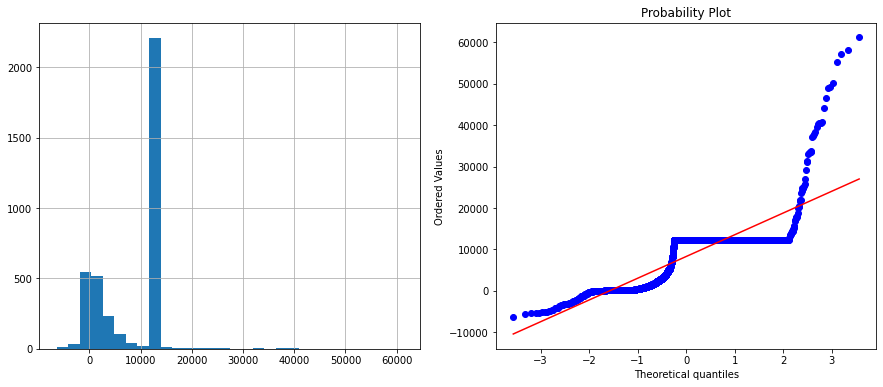

In [16]:
diagnostic_plots(data, 'exactDiffernce')

###  Удаление константных и псевдоконстантных признаков

In [19]:
from sklearn.feature_selection import VarianceThreshold

In [136]:
data = pd.read_csv('dataset.csv', sep = ',')
print(data.shape)

(345, 20)


In [138]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20
0,0.341,0.325,0.764,0.771,0.201,0,0.138,0.247,0.406,0.905,0.213,0.695,0.352,0.074,0.248,0.848,0.669,0,0.019,0.707
1,0.840,0.845,0.617,0.142,0.269,0,0.466,0.918,0.885,0.042,0.796,0.353,0.405,0.535,0.901,0.749,0.778,0,0.513,0.333
2,0.251,0.263,0.842,0.020,0.960,0,0.218,0.441,0.560,0.282,0.587,0.193,0.642,0.177,0.249,0.351,0.330,0,0.697,0.696
3,0.447,0.125,0.028,0.889,0.771,0,0.735,0.249,0.284,0.365,0.125,0.796,0.770,0.543,0.854,0.400,0.801,0,0.486,0.467
4,0.696,0.736,0.177,0.976,0.782,0,0.483,0.560,0.470,0.458,0.484,0.331,0.797,0.422,0.455,0.474,0.382,0,0.205,0.759


In [141]:
selector = VarianceThreshold(threshold=0.15)
selector.fit(data)
selector.variances_
# Оно не работает, поэтому я сделаю другим способом

ValueError: No feature in X meets the variance threshold 0.15000

In [145]:
[(c, len(data[c].unique())) for c in data]

[('f1', 290),
 ('f2', 287),
 ('f3', 292),
 ('f4', 278),
 ('f5', 296),
 ('f6', 1),
 ('f7', 291),
 ('f8', 288),
 ('f9', 289),
 ('f10', 293),
 ('f11', 302),
 ('f12', 295),
 ('f13', 291),
 ('f14', 277),
 ('f15', 292),
 ('f16', 302),
 ('f17', 294),
 ('f18', 3),
 ('f19', 288),
 ('f20', 291)]

In [147]:
columns = [c for c in data if len(data[c].unique())>3]

In [148]:
data=data[columns]

In [150]:
data

,f1,f2,f3,f4,f5,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f19,f20
0,0.341,0.325,0.764,0.771,0.201,0.138,0.247,0.406,0.905,0.213,0.695,0.352,0.074,0.248,0.848,0.669,0.019,0.707
1,0.840,0.845,0.617,0.142,0.269,0.466,0.918,0.885,0.042,0.796,0.353,0.405,0.535,0.901,0.749,0.778,0.513,0.333
2,0.251,0.263,0.842,0.020,0.960,0.218,0.441,0.560,0.282,0.587,0.193,0.642,0.177,0.249,0.351,0.330,0.697,0.696
3,0.447,0.125,0.028,0.889,0.771,0.735,0.249,0.284,0.365,0.125,0.796,0.770,0.543,0.854,0.400,0.801,0.486,0.467
4,0.696,0.736,0.177,0.976,0.782,0.483,0.560,0.470,0.458,0.484,0.331,0.797,0.422,0.455,0.474,0.382,0.205,0.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,0.440,0.945,0.147,0.564,0.334,0.292,0.742,0.521,0.572,0.488,0.347,0.917,0.567,0.949,0.927,0.259,0.401,0.445
341,0.371,0.236,0.417,0.371,0.047,0.491,0.868,0.783,0.360,0.755,0.931,0.842,0.199,0.395,0.063,0.560,0.611,0.107
342,0.548,0.012,0.963,0.048,0.241,0.436,0.832,0.371,0.029,0.928,0.004,0.083,0.826,0.622,0.305,0.102,0.601,0.227
343,0.860,0.086,0.185,0.763,0.842,0.317,0.468,0.702,0.269,0.519,0.331,0.930,0.899,0.449,0.027,0.822,0.847,0.678


### Ящик с усами

<AxesSubplot:xlabel='f9'>

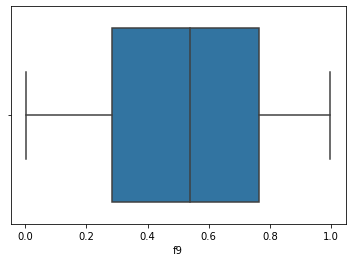

In [151]:
sns.boxplot(x=data['f9'])